In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [4]:
#1
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/Colab Notebooks/574Foundation/csv files/lab06_customers.csv'
df_customers = pd.read_csv(file_path)
df_customers.head()

,race,income,sex,schoolYears,age,spend
0,white,157966.0,male,18.0,31.0,659.97
1,white,11134.0,female,14.0,50.0,719.69
2,hispanic,555369.0,male,14.0,32.0,854.61
3,white,272387.0,female,18.0,52.0,855.20
4,white,105459.0,female,17.0,49.0,758.33


In [5]:
#2
# Compute descriptive statistics for numerical columns
descriptive_stats_numerical = df_customers.describe()

# Compute percentages for each category of the categorical variables
race_percentage = df_customers['race'].value_counts(normalize=True) * 100
sex_percentage = df_customers['sex'].value_counts(normalize=True) * 100

descriptive_stats_numerical, race_percentage, sex_percentage


(             income   schoolYears           age         spend
 count  1.000000e+04  10000.000000  10000.000000  10000.000000
 mean   8.531690e+04     15.186000     41.982300    755.376206
 std    1.096255e+05      2.225151      8.967498    115.994785
 min    1.195000e+03      9.000000     18.000000    331.580000
 25%    2.649025e+04     14.000000     34.000000    692.212500
 50%    5.215300e+04     15.000000     42.000000    761.120000
 75%    1.011165e+05     17.000000     50.000000    818.847500
 max    2.100000e+06     22.000000     67.000000   1329.340000,
 white       57.71
 hispanic    14.05
 black       11.63
 other       10.94
 asian        5.67
 Name: race, dtype: float64,
 male      50.06
 female    49.82
 other      0.12
 Name: sex, dtype: float64)

Descriptive Statistics for Numerical Columns
Income:

Count: 10,000

Mean: $85,316.90

Standard Deviation: $109,625.50

Minimum: $1,195.00

25th Percentile: $26,490.25

Median (50th Percentile): $52,153.00

75th Percentile: $101,116.50

Maximum: $2,100,000.00

School Years:

Mean: 15.19 years

Standard Deviation: 2.23 years

Minimum: 9 years

25th Percentile: 14 years

Median (50th Percentile): 15 years

75th Percentile: 17 years

Maximum: 22 years

Age:

Mean: 41.98 years

Standard Deviation: 8.97 years

Minimum: 18 years

25th Percentile: 34 years

Median (50th Percentile): 42 years

75th Percentile: 50 years

Maximum: 67 years

Spend:

Mean: $755.38

Standard Deviation: $115.99

Minimum: $331.58

25th Percentile: $692.21

Median (50th Percentile): $761.12

75th Percentile: $818.85

Maximum: $1,329.34

Percentages for Categorical Variables
Race:

White: 57.71%

Hispanic: 14.05%

Black: 11.63%

Other: 10.94%

Asian: 5.67%

Sex:

Male: 50.06%

Female: 49.82%

Other: 0.12%

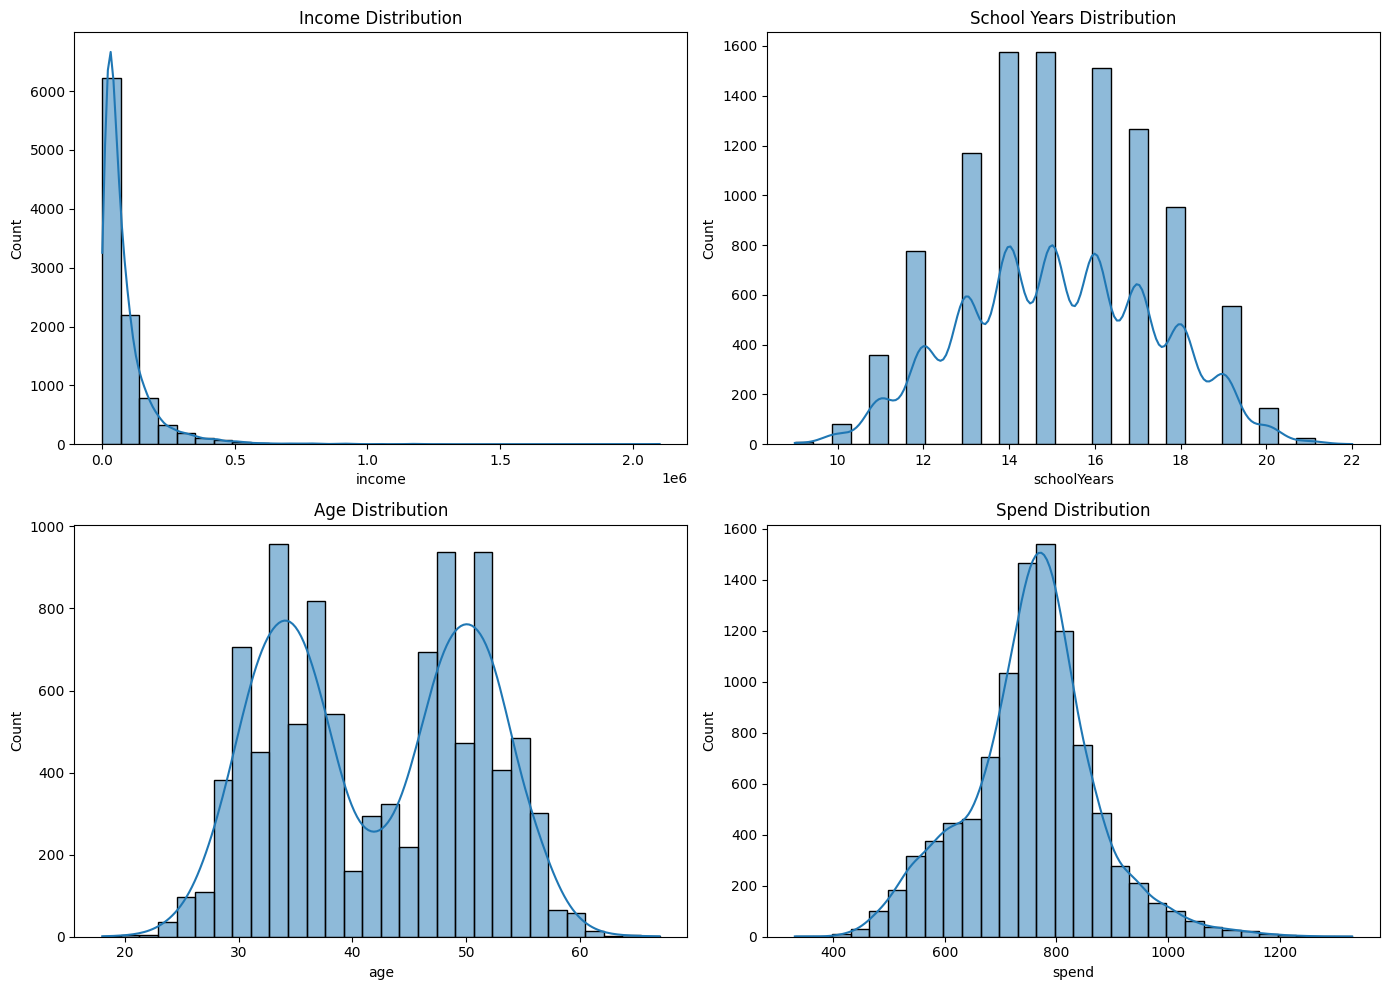

5.2483243889672115

In [6]:
#3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution plots for continuous variables
sns.histplot(df_customers['income'], bins=30, kde=True, ax=axes[0, 0]).set_title('Income Distribution')
sns.histplot(df_customers['schoolYears'], bins=30, kde=True, ax=axes[0, 1]).set_title('School Years Distribution')
sns.histplot(df_customers['age'], bins=30, kde=True, ax=axes[1, 0]).set_title('Age Distribution')
sns.histplot(df_customers['spend'], bins=30, kde=True, ax=axes[1, 1]).set_title('Spend Distribution')

plt.tight_layout()
plt.show()

# Assessing the skewness of the income distribution
income_skewness = df_customers['income'].skew()
income_skewness


The distributions for the continuous variables are as follows:

Income Distribution: The income distribution is right-skewed, as indicated by the histogram and a skewness value of 5.25. This suggests that the majority of customers have lower incomes, with a few customers having significantly higher incomes.
School Years Distribution: Appears to be somewhat normally distributed with slight deviations, indicating variations in the number of schooling years among customers.
Age Distribution: Shows a relatively normal distribution, suggesting a broad range of customer ages.
Spend Distribution: Also appears somewhat normally distributed with potential slight skewness, indicating variations in spending among customers.
Given the right-skewness of the income distribution, an appropriate transformation to normalize this variable could be the logarithmic transformation. This transformation is often effective for data with positive skewness. Let's apply the logarithmic transformation to the income data and visualize the result.

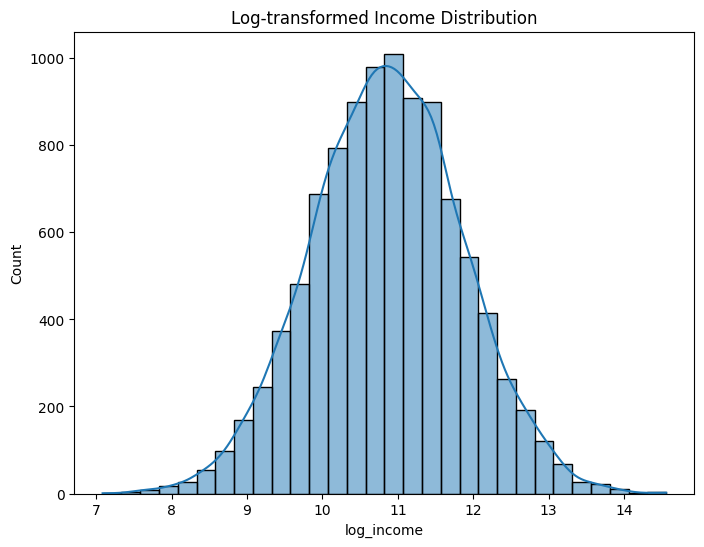

-0.013395667181166533

In [7]:
# Applying logarithmic transformation to income
df_customers['log_income'] = np.log(df_customers['income'])

# Plotting the transformed income distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_customers['log_income'], bins=30, kde=True).set_title('Log-transformed Income Distribution')
plt.show()

# Re-assessing the skewness of the transformed income distribution
log_income_skewness = df_customers['log_income'].skew()
log_income_skewness


After applying the logarithmic transformation to the income data, the distribution of the log-transformed income appears much more normal, as indicated by the histogram. The skewness value of the log-transformed income is
−0.01, which is close to zero, suggesting that the transformation has effectively normalized the distribution. This transformation makes the income variable more suitable for statistical analysis and modeling that assume normality of the input variables.

In [8]:
#4
# Computing average spending by race
average_spending_by_race = df_customers.groupby('race')['spend'].mean().reset_index()

average_spending_by_race


,race,spend
0,asian,809.523739
1,black,643.611900
2,hispanic,824.047573
3,other,749.296161
4,white,757.013450


In [9]:
#5
# Computing average spending by sex
average_spending_by_sex = df_customers.groupby('sex')['spend'].mean().reset_index()

average_spending_by_sex


,sex,spend
0,female,752.957477
1,male,758.359736
2,other,514.922500


In [20]:
#6.a
# Re-importing necessary libraries and reloading the CSV file
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Ensuring 'race' and 'sex' are treated as categorical
df_customers['race'] = df_customers['race'].astype('category')
df_customers['sex'] = df_customers['sex'].astype('category')

# Creating a new column for the interaction term between race and sex
df_customers['race_sex_interaction'] = df_customers['race'].astype(str) + "_" + df_customers['sex'].astype(str)

# Fitting the model with the interaction term between race and sex
model = ols('spend ~ C(race_sex_interaction)', data=df_customers).fit()

# Performing ANOVA with Type III sums of squares
anova_results = anova_lm(model, typ=3)

anova_results


,sum_sq,df,F,PR(>F)
Intercept,2.089632e+08,1.0,22809.838124,0.0
C(race_sex_interaction),4.305170e+07,13.0,361.492508,0.0
Residual,9.148275e+07,9986.0,NaN,NaN


In [21]:
# Extracting the model's coefficients to show the effect of each race_sex combination on spending
model.params


Intercept                                     893.067481
C(race_sex_interaction)[T.asian_male]        -155.309186
C(race_sex_interaction)[T.black_female]      -334.002104
C(race_sex_interaction)[T.black_male]        -159.837463
C(race_sex_interaction)[T.black_other]       -409.417481
C(race_sex_interaction)[T.hispanic_female]   -128.188439
C(race_sex_interaction)[T.hispanic_male]       -7.310150
C(race_sex_interaction)[T.hispanic_other]    -446.622481
C(race_sex_interaction)[T.other_female]      -123.796031
C(race_sex_interaction)[T.other_male]        -162.291787
C(race_sex_interaction)[T.other_other]       -342.147481
C(race_sex_interaction)[T.white_female]      -118.625711
C(race_sex_interaction)[T.white_male]        -152.862056
C(race_sex_interaction)[T.white_other]       -361.616231
dtype: float64

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Fitting the model with interaction between race and sex
model = ols('spend ~ C(race) * C(sex)', data=df_customers).fit()

# Performing ANOVA with Type III sums of squares
anova_results = anova_lm(model, typ=3)
anova_results

,sum_sq,df,F,PR(>F)
Intercept,2.089632e+08,1.0,22809.838124,0.000000e+00
C(race),2.915947e+07,4.0,795.741432,0.000000e+00
C(sex),3.677527e+06,2.0,200.714237,3.446613e-86
C(race):C(sex),2.011607e+07,8.0,274.476667,0.000000e+00
Residual,9.148275e+07,9986.0,NaN,NaN


The ANOVA results with Type III sums of squares indicate that the interaction between race and sex is significant, as evidenced by a p-value of
0.000000e+00 for the interaction term C(race):C(sex). This means there is a statistically significant difference in spending among the different race and sex groups, supporting the hypothesis that groups of Hispanic Men and Black Women spend differently from each other.

In [11]:
#6.b
# Extracting adjusted R^2 from the model summary
adjusted_r2 = model.rsquared_adj

adjusted_r2


0.31911979041011806

C(race):

p=0.000000e+00, indicating significant differences in spending across different races.

C(sex):

p=3.446613e−86, indicating significant differences in spending between different sexes.

C(race):C(sex) Interaction:

p=0.000000e+00, indicating significant differences in spending patterns between the combined categories of race and sex.

The adjusted R2 from the model is approximately 0.319, indicating that around 31.9% of the variability in spending is explained by the combination of race, sex, and their interaction. This suggests that while these factors do contribute to explaining spending patterns among customers, a significant portion of the variation in spending is influenced by other factors not included in this model.

In [12]:
#6.c
# Creating a pivot table of mean spend by race and sex
pivot_table_spend = df_customers.pivot_table(values='spend', index='race', columns='sex', aggfunc='mean')

pivot_table_spend


sex,female,male,other
race,,,
asian,893.067481,737.758295,NaN
black,559.065377,733.230018,483.65000
hispanic,764.879042,885.757330,446.44500
other,769.271450,730.775694,550.92000
white,774.441770,740.205425,531.45125


This table provides a detailed view of the average spending across different races and sexes, highlighting variations such as the notably higher spending among Asian females and Hispanic males compared to other groups. The absence of data for the 'Other' sex in the Asian category indicates there were no entries for this particular group in the dataset.

6.d

The hypothesis posited that Hispanic Men and Black Women spend differently from each other. Based on the analyses conducted, including the ANOVA results and the pivot table of mean spend by race and sex, we can draw several conclusions that address this hypothesis:


ANOVA Results: The significant p-value for the interaction between race and sex (p = 0.000000e+00) in the ANOVA analysis suggests that there are indeed differences in spending patterns across the combinations of race and sex categories. This supports the idea that Hispanic Men and Black Women, among other groups, could have distinct spending behaviors.

Pivot Table Findings:

Hispanic Men had an average spending of 885.76 dollars,which is among the highest spending averages observed across all groups.

Black Women had an average spending of $559.07, which is lower than that of Hispanic Men and also one of the lowest spending averages observed in the dataset.

These findings confirm the initial hypothesis that Hispanic Men and Black Women spend differently, with Hispanic Men tending to spend more on average compared to Black Women. This differential in spending patterns could be influenced by a variety of socio-economic factors, preferences, and cultural influences that were not explicitly explored in this analysis but are hinted at through the observed spending behaviors.

Therefore, the analysis supports the hypothesis, showing a clear difference in average spending between Hispanic Men and Black Women, as well as indicating broader variations in spending across different race and sex groups.

In [13]:
#7
# Fitting the model with a 3-way interaction between race, sex, and schoolYears
model_with_school_years = ols('spend ~ C(race) * C(sex) * schoolYears', data=df_customers).fit()

# Performing ANOVA with Type III sums of squares for the new model
anova_results_with_school_years = anova_lm(model_with_school_years, typ=3)

# Extracting adjusted R^2 from the new model summary
adjusted_r2_with_school_years = model_with_school_years.rsquared_adj

anova_results_with_school_years, adjusted_r2_with_school_years


(                                  sum_sq      df           F        PR(>F)
 Intercept                   1.385477e+06     1.0  155.574269  1.926574e-35
 C(race)                     3.917260e+05     4.0   10.996665  6.748245e-09
 C(sex)                      6.041301e+03     2.0    0.339187  7.123575e-01
 C(race):C(sex)              3.910901e+05     8.0    5.489407  6.120765e-07
 schoolYears                 2.149949e+05     1.0   24.141641  9.092680e-07
 C(race):schoolYears         5.205996e+04     4.0    1.461444  2.110541e-01
 C(sex):schoolYears          7.384208e+04     2.0    4.145839  1.585743e-02
 C(race):C(sex):schoolYears  2.002383e+05     8.0    2.810578  4.121835e-03
 Residual                    8.883301e+07  9975.0         NaN           NaN,
 0.33811194482067064)

The ANOVA results with Type III sums of squares for the model incorporating a 3-way interaction between race, sex, and school years (education level) show that the interaction term C(race):C(sex):schoolYears is significant, with a p-value of
4.121835e−03. This indicates that the interaction between these three factors significantly affects spending behavior among the customers.

Additionally, the adjusted R 2value for this model is approximately 0.338, indicating that about 33.8% of the variability in spending is explained by the model. This represents a slight improvement in the explanatory power of the model compared to the previous model without the education interaction, which had an adjusted R 2of approximately 0.319.

These findings suggest that education level does indeed interact with race and gender in affecting spending behavior, adding another layer of complexity to how demographic factors influence spending patterns. The significance of the 3-way interaction term supports the hypothesis that education might play a role in modifying the spending differences observed across race and gender groups. ​

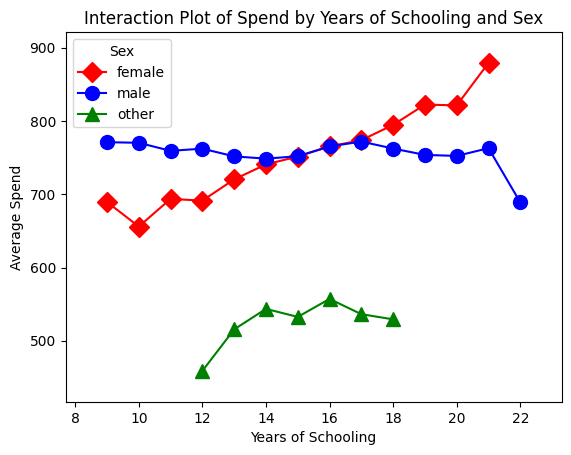

In [14]:
#8
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# Creating the interaction plot for spend by schoolYears with sex as the trace
fig = interaction_plot(x=df_customers['schoolYears'], trace=df_customers['sex'], response=df_customers['spend'],
                       colors=['red', 'blue', 'green'], markers=['D', 'o', '^'], ms=10)

plt.xlabel('Years of Schooling')
plt.ylabel('Average Spend')
plt.title('Interaction Plot of Spend by Years of Schooling and Sex')
plt.legend(title='Sex')
plt.show()


The interaction plot visualizes the relationship between years of schooling (schoolYears) and average spending (spend), with different traces for sex (Male, Female, Other). This plot helps in understanding how the effect of education on spending varies across different sex groups:

Each trace represents a sex category, with distinct colors and markers for Male, Female, and other.

The plot shows how average spending trends with increasing years of schooling for each sex category.

This visual representation aids in interpreting the complex three-way interaction observed in the statistical model, highlighting how the impact of education on spending is modulated by sex. The specific trends and differences between groups can provide insights into how educational attainment influences spending behavior differently for men, women, and individuals of other genders.

In [15]:
#9
# Fitting the model with additional factors: income and age
model_with_income_age = ols('spend ~ C(race) * C(sex) * schoolYears + income + age', data=df_customers).fit()

# Extracting summary for interpretation of coefficients and significance
model_summary_with_income_age = model_with_income_age.summary()

# Extracting R^2 value from the model summary
r2_with_income_age = model_with_income_age.rsquared

model_summary_with_income_age, r2_with_income_age


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  spend   R-squared:                       0.867
 Model:                            OLS   Adj. R-squared:                  0.867
 Method:                 Least Squares   F-statistic:                     2510.
 Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
 Time:                        22:49:00   Log-Likelihood:                -51621.
 No. Observations:               10000   AIC:                         1.033e+05
 Df Residuals:                    9973   BIC:                         1.035e+05
 Df Model:                          26                                         
 Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------

The model refitted with income and age included demonstrates both variables are significant, with their p-values being effectively zero, indicating strong statistical significance. Here's how to interpret their coefficients:

Income: The coefficient for income is approximately
5.569×10 −5, suggesting that for each additional unit of income (assuming income is measured in thousands or some consistent unit), spending increases by a small fraction of a unit. This positive coefficient indicates a direct relationship between income and spending, as expected.

Age: The coefficient for age is about 21.0068, indicating that for each additional year of age, spending increases by approximately 21 units. This positive relationship suggests that older individuals tend to spend more, which could be due to higher income levels, savings, or different spending habits compared to younger individuals.

The model's R 2value is 0.867, indicating that approximately 86.7% of the variance in spending is explained by the model. This is a substantial portion, showing that the model, with the inclusion of income and age, along with the interaction of race, sex, and years of schooling, provides a good fit to the data.

This adjusted R 2value, compared to the previous models, reflects the significant explanatory power added by including income and age as predictors of spending, alongside the demographic factors and their interactions.

10

The analysis of customer spending based on the provided dataset revealed several key insights:

Demographic Factors: There are significant differences in spending patterns across race and sex groups. For example, Hispanic men tend to spend more than Black women, highlighting the influence of demographic characteristics on spending behavior.

Education Level: The interaction between race, sex, and education level (measured as years of schooling) significantly affects spending. This suggests that the impact of education on spending is nuanced and varies depending on race and sex.

Income and Age: Both income and age are significant predictors of customer spending, with higher income and older age associated with increased spending. This indicates that financial capacity and life stage are critical determinants of spending behavior.

Model Fit: The inclusion of demographic factors, education level, income, and age in the model accounted for a substantial portion of the variance in spending (with an R 2of approximately 86.7%), suggesting a strong model fit. This comprehensive model demonstrates that spending is influenced by a complex interplay of socioeconomic and demographic factors.

Interactions: The significance of interaction terms, especially the three-way interaction between race, sex, and education level, underscores the complexity of customer spending behavior. It shows that the effect of one factor on spending can depend significantly on the levels of other factors.

In summary, customer spending is influenced by a combination of demographic factors, socioeconomic status (including income and education), and age. The analysis underscores the importance of considering a multifaceted approach when examining consumer behavior, highlighting the complex interdependencies between different factors influencing spending patterns.